## Tidy Data Project: Federal Research and Development Budgets

This is the Jupiter Notebook for my Tidy Data Project, using the data file regarding the federal research and development budgets across different government departments.

#### Section One: Data Cleaning and Tidying Process

In tyding the data, I must first define my dataframe

In [52]:
import pandas as pd # import pandas dictionary to be referred to later
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import squarify

df_fedrd = pd.read_csv('fed_rd_year&gdp.csv') # define dataframe

Next, I need to melt my dataframe such that the different variables are defined. This step is what reorients the columns such that the years and GDPs, which are values, are not correctly different rows. It must still be split such that the year and GDP variables are different columns. 

In [53]:
df_fedrd_melted = pd.melt(df_fedrd,
                          id_vars = 'department', # holds constant the column for department
                          value_vars = df_fedrd.columns[1:], # selects all the columns to be reoriented
                          var_name = 'Year_GDP', # renames the column now containing the previous column names
                          value_name='Research and Development Budget') #names the column containing all of the values from the original untidy dataframe

df_fedrd_melted

,department,Year_GDP,Research and Development Budget
0,DHS,1976_gdp1790000000000.0,NaN
1,DOC,1976_gdp1790000000000.0,8.190000e+08
2,DOD,1976_gdp1790000000000.0,3.569600e+10
3,DOE,1976_gdp1790000000000.0,1.088200e+10
4,DOT,1976_gdp1790000000000.0,1.142000e+09
...,...,...,...
583,NIH,2017_gdp19177000000000.0,3.305200e+10
584,NSF,2017_gdp19177000000000.0,6.040000e+09
585,Other,2017_gdp19177000000000.0,1.553000e+09
586,USDA,2017_gdp19177000000000.0,2.625000e+09


Now, I still need to split the dataframe such that the gdp and year are different columns, with correct formatting

In [54]:
df_fedrd_melted[['Year','GDP']] = df_fedrd_melted['Year_GDP'].str.split('_', expand=True) # splits the column with two variables into two columns, expand=true makes them two columns instead of a list of two variables
df_fedrd_melted_tidy = df_fedrd_melted.drop('Year_GDP', axis=1) # gets rid of messy/unwanted column
df_fedrd_melted_tidy['GDP'] = df_fedrd_melted_tidy['GDP'].str.replace('gdp','') # fixes formatting such that GDP column does not contain unnecessary information
df_fedrd_melted_tidy

,department,Research and Development Budget,Year,GDP
0,DHS,NaN,1976,1790000000000.0
1,DOC,8.190000e+08,1976,1790000000000.0
2,DOD,3.569600e+10,1976,1790000000000.0
3,DOE,1.088200e+10,1976,1790000000000.0
4,DOT,1.142000e+09,1976,1790000000000.0
...,...,...,...,...
583,NIH,3.305200e+10,2017,19177000000000.0
584,NSF,6.040000e+09,2017,19177000000000.0
585,Other,1.553000e+09,2017,19177000000000.0
586,USDA,2.625000e+09,2017,19177000000000.0


The next step is to tidy the data with regards to the missing data, as for the first few years there is no recorded information regarding the research and development budget of the DHS. What is missing from this dataset, nore specifically, is the research and development budget for the department DHS (that is the department for homeland security), from 1976 to 2001. This makes sense because the department of homeland security was created in 2002. Thus, this value is missing at random. It is not dependent on the value of the budget itself but instead dependent on a different variable. Thus, what makes the most sense with regards to this missing data is a deletion of the missing observations, or null values.

In [55]:
df_fedrd_melted_tidy = df_fedrd_melted_tidy.dropna() # .dropna() removes all of the null values from the data frame
df_fedrd_melted_tidy

,department,Research and Development Budget,Year,GDP
1,DOC,8.190000e+08,1976,1790000000000.0
2,DOD,3.569600e+10,1976,1790000000000.0
3,DOE,1.088200e+10,1976,1790000000000.0
4,DOT,1.142000e+09,1976,1790000000000.0
5,EPA,9.680000e+08,1976,1790000000000.0
...,...,...,...,...
583,NIH,3.305200e+10,2017,19177000000000.0
584,NSF,6.040000e+09,2017,19177000000000.0
585,Other,1.553000e+09,2017,19177000000000.0
586,USDA,2.625000e+09,2017,19177000000000.0


#### Section Two: Analysis of the Data

##### Part One: Pivot Tables and Aggregation Functions

The below table uses mean aggregation functions to demonstrate the mean GDP and Research Development Budget for each of the federal departments in the dataset. The mean GDP is constant across all departments because that was a value representing the Gross Domestic Product of the combined funds the federal govenrment distributed. Thus, the GDP was dependent on time but did not differ across department in any specific year. This is true for all of the departments except the department of homeland security because that was not enacted until 2002.

In [56]:
# in order to calculate the mean and use aggregation functions, the values need to be numeric datatypes, cannot be objects
df_fedrd_melted_tidy.loc[:,'Research and Development Budget'] = pd.to_numeric(df_fedrd_melted_tidy['Research and Development Budget']) 
df_fedrd_melted_tidy.loc[:,'GDP'] = pd.to_numeric(df_fedrd_melted_tidy['GDP'])
df_fedrd_melted_tidy.loc[:, 'Year'] = pd.to_numeric(df_fedrd_melted_tidy['Year'])

In [57]:
pivot_table_department = pd.pivot_table(df_fedrd_melted_tidy, 
                                          values = ['Research and Development Budget', 'GDP'], 
                                          index = 'department', aggfunc = 'mean')
pivot_table_department

,GDP,Research and Development Budget
department,,
DHS,14997312500000.0,9.948750e+08
DOC,9175119047619.046875,1.231500e+09
DOD,9175119047619.046875,6.468519e+10
DOE,9175119047619.046875,1.188338e+10
DOT,9175119047619.046875,9.177857e+08
EPA,9175119047619.046875,7.504286e+08
HHS,9175119047619.046875,2.229676e+10
Interior,9175119047619.046875,9.005714e+08
NASA,9175119047619.046875,1.214026e+10


The next table uses the mean aggregation function to display the average research and development budget across departments. That is, consdiering the gross domestic product from the federal governnment, this displays the average amount of money provided.

In [58]:
pivot_table_gdp = pd.pivot_table(df_fedrd_melted_tidy, 
                                 values = ['Year','Research and Development Budget'],
                                 index = 'GDP',
                                 aggfunc = 'mean')
pivot_table_gdp

,Research and Development Budget,Year
GDP,,
1.790000e+12,6.632846e+09,1976.0
2.028000e+12,7.062077e+09,1977.0
2.278000e+12,7.297231e+09,1978.0
2.570000e+12,7.430846e+09,1979.0
2.797000e+12,7.408077e+09,1980.0
3.138000e+12,7.561846e+09,1981.0
3.314000e+12,7.342154e+09,1982.0
3.541000e+12,7.308462e+09,1983.0
3.953000e+12,8.105462e+09,1984.0


##### Part Two: Visualizations

GDP with time

Text(0.5, 1.0, 'GDP with respect to Time')

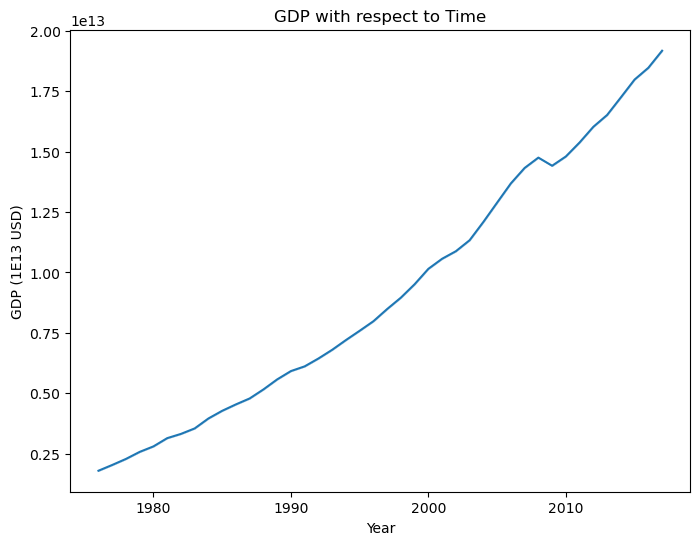

In [84]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df_fedrd_melted_tidy['Year'],
             y=df_fedrd_melted_tidy['GDP'],
             data = df_fedrd_melted_tidy)
plt.xlabel('Year')
plt.ylabel('GDP (1E13 USD)')
plt.title('GDP with respect to Time')

Above I created a chart demonstrating how the average budget related to the federal GDP. I am now using a connected scatter plot to demonstrate the trend between GDP and budget.

In [74]:
# create a dataframe with the values created from the pivot table, resetting the index such that GDP is once again a column in the dataframe
df_gdp_rdbudget=pd.DataFrame(pivot_table_gdp)
df_gdp_rdbudget['GDP']=df_gdp_rdbudget.index
df_gdp_rdbudget = df_gdp_rdbudget.reset_index(drop=True)

Text(0.5, 1.0, 'Research and Development Budget with respect to Federal GDP')

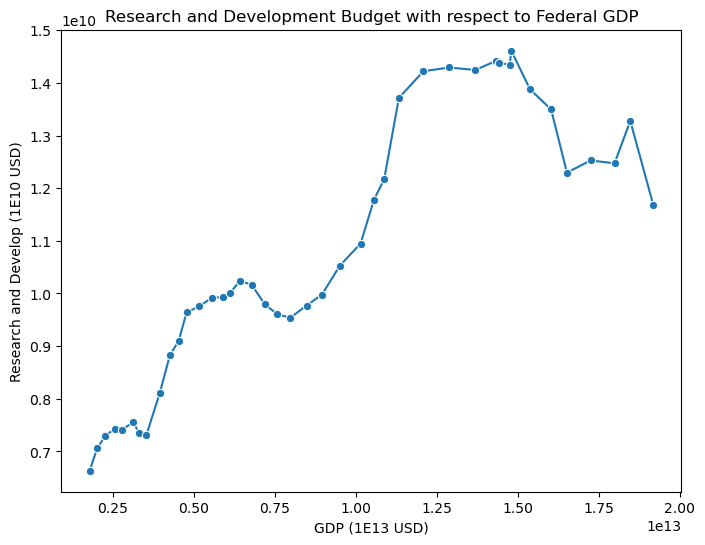

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(x = df_gdp_rdbudget['GDP'],
             y = df_gdp_rdbudget['Research and Development Budget'],
             data = df_gdp_rdbudget,
             marker = 'o')
plt.xlabel('GDP (1E13 USD)')
plt.ylabel("Research and Develop Budget (1E10 USD)")
plt.title('Research and Development Budget with respect to Federal GDP')

To compare the distribution of the research and development budget to the various departments throughout time, I am using three different tree charts. The tree charts are helpful because they more clearly demonstrate the difference in sizing, as opposed to pie charts which use angles. I am comparing the years 1977, 1997, and 2017.

In [60]:
df_fedrd_1977 = df_fedrd_melted_tidy[df_fedrd_melted_tidy['Year']==1977]
df_fedrd_1997 = df_fedrd_melted_tidy[df_fedrd_melted_tidy['Year']==1997]
df_fedrd_2017 = df_fedrd_melted_tidy[df_fedrd_melted_tidy['Year']==2017]

Text(0.5, 1.0, 'Distribution of Budget across Departments in 2017')

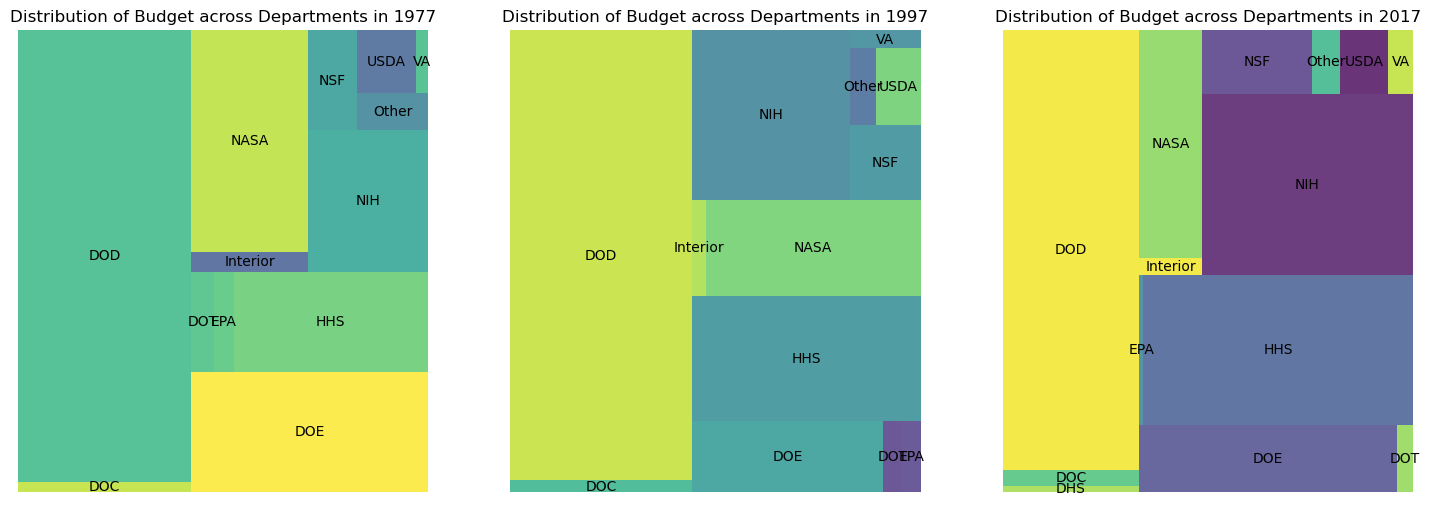

In [98]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
squarify.plot(sizes=df_fedrd_1977['Research and Development Budget'], 
              label=df_fedrd_1977['department'], 
              alpha=0.8)
plt.axis('off')
plt.title('Distribution of Budget across Departments in 1977')

plt.subplot(1,3,2)
squarify.plot(sizes=df_fedrd_1997['Research and Development Budget'], 
              label=df_fedrd_1997['department'], 
              alpha=0.8)
plt.axis('off')
plt.title('Distribution of Budget across Departments in 1997')

plt.subplot(1,3,3)
squarify.plot(sizes=df_fedrd_2017['Research and Development Budget'], 
              label=df_fedrd_2017['department'], 
              alpha=0.8)
plt.axis('off')
plt.title('Distribution of Budget across Departments in 2017')

Sources Used:
- https://stackoverflow.com/questions/15891038/change-column-type-in-pandas 
- https://stackoverflow.com/questions/51004029/create-a-new-dataframe-based-on-rows-with-a-certain-value 
- https://stackoverflow.com/questions/20461165/how-to-convert-index-of-a-pandas-dataframe-into-a-column
- https://stackoverflow.com/questions/20490274/how-to-reset-index-in-a-pandas-dataframe
- https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
